In [1]:
import sys
sys.path.append('../../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import visualization.visualize as vis


plt.rcParams.update({'font.size': 12})
pd.set_option('display.max_rows', 500)

In [2]:
filename = '../../data/raw/Myocardial infarction complications Database.csv'
data = pd.read_csv(filename)
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [4]:
data_desc = data.describe().transpose()
data_desc['n_nulls'] = [data[idx].isnull().sum() for idx in data_desc.index]
data_desc

,count,mean,std,min,25%,50%,75%,max,n_nulls
ID,1700.0,850.500000,490.892045,1.00,425.75,850.50,1275.25,1700.00,0
AGE,1692.0,61.856974,11.259936,26.00,54.00,63.00,70.00,92.00,8
SEX,1700.0,0.626471,0.483883,0.00,0.00,1.00,1.00,1.00,0
INF_ANAM,1696.0,0.554835,0.836801,0.00,0.00,0.00,1.00,3.00,4
STENOK_AN,1594.0,2.316186,2.440586,0.00,0.00,1.00,5.00,6.00,106
FK_STENOK,1627.0,1.205286,1.040814,0.00,0.00,2.00,2.00,4.00,73
IBS_POST,1649.0,1.160703,0.801400,0.00,0.00,1.00,2.00,2.00,51
IBS_NASL,72.0,0.375000,0.487520,0.00,0.00,0.00,1.00,1.00,1628
GB,1691.0,1.393258,1.088803,0.00,0.00,2.00,2.00,3.00,9
SIM_GIPERT,1692.0,0.033688,0.180478,0.00,0.00,0.00,0.00,1.00,8


In [5]:
data_desc_null = data_desc[data_desc['n_nulls'] > 0.1*data.shape[0]].sort_values(by='n_nulls', ascending=False)
data_desc_null

,count,mean,std,min,25%,50%,75%,max,n_nulls
KFK_BLOOD,4.0,2.000000,1.095445,1.20,1.35,1.60,2.25,3.60,1696
IBS_NASL,72.0,0.375000,0.487520,0.00,0.00,0.00,1.00,1.00,1628
S_AD_KBRIG,624.0,136.907051,34.997835,0.00,120.00,140.00,160.00,260.00,1076
D_AD_KBRIG,624.0,81.394231,19.745045,0.00,70.00,80.00,90.00,190.00,1076
NOT_NA_KB,1014.0,0.691321,0.462176,0.00,0.00,1.00,1.00,1.00,686
LID_KB,1023.0,0.387097,0.487324,0.00,0.00,0.00,1.00,1.00,677
NA_KB,1043.0,0.592522,0.491601,0.00,0.00,1.00,1.00,1.00,657
NA_BLOOD,1325.0,136.550943,6.512120,117.00,133.00,136.00,140.00,169.00,375
GIPER_NA,1325.0,0.022642,0.148814,0.00,0.00,0.00,0.00,1.00,375
K_BLOOD,1329.0,4.191422,0.754076,2.30,3.70,4.10,4.60,8.20,371


# Plotting some graphs:

In [6]:
INPUT_COLS = data.columns[0:112]
INPUT_COLS

Index(['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT',
       ...
       'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n'],
      dtype='object', length=112)

In [7]:
INPUT_COLS_1stday = list(data.columns[[92, 99, 102]])
INPUT_COLS_1stday

['R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']

In [8]:
INPUT_COLS_2ndday = list(data.columns[[93, 100, 103]])
INPUT_COLS_2ndday

['R_AB_2_n', 'NA_R_2_n', 'NOT_NA_2_n']

In [9]:
INPUT_COLS_3rdday = list(data.columns[[94, 101, 104]])
INPUT_COLS_3rdday

['R_AB_3_n', 'NA_R_3_n', 'NOT_NA_3_n']

In [10]:
OUTPUT_COLS = data.columns[112:]
OUTPUT_COLS

Index(['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
       'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN',
       'LET_IS'],
      dtype='object')

In [11]:
ID_COLS = ['ID']
TARGET_COLS = ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
               'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
TARGET_COL = 'LET_IS'

In [12]:
FEATURE_COLS = np.array(data.columns[~np.isin(data.columns, ID_COLS+TARGET_COLS)])
FEATURE_COLS

array(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11',
       'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01',
       'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01',
       'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03',
       'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG',
       'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST',
       'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im',
       'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08',
       'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04',
       'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09',
       'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04',
       'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08',
       'n_p

In [13]:
boxplot_cols = list(data_desc.sort_values(by='mean', ascending=False).index[~np.isin(data_desc.index, ID_COLS+TARGET_COLS)])

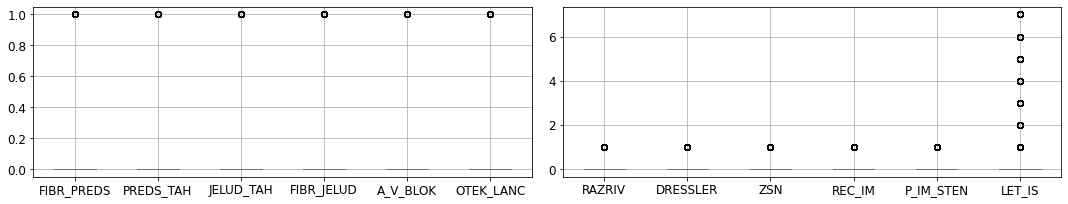

In [14]:
vis.plot_feature_boxplots(data, TARGET_COLS, figsize=(15, 3), subplot_layout=(1, 2))

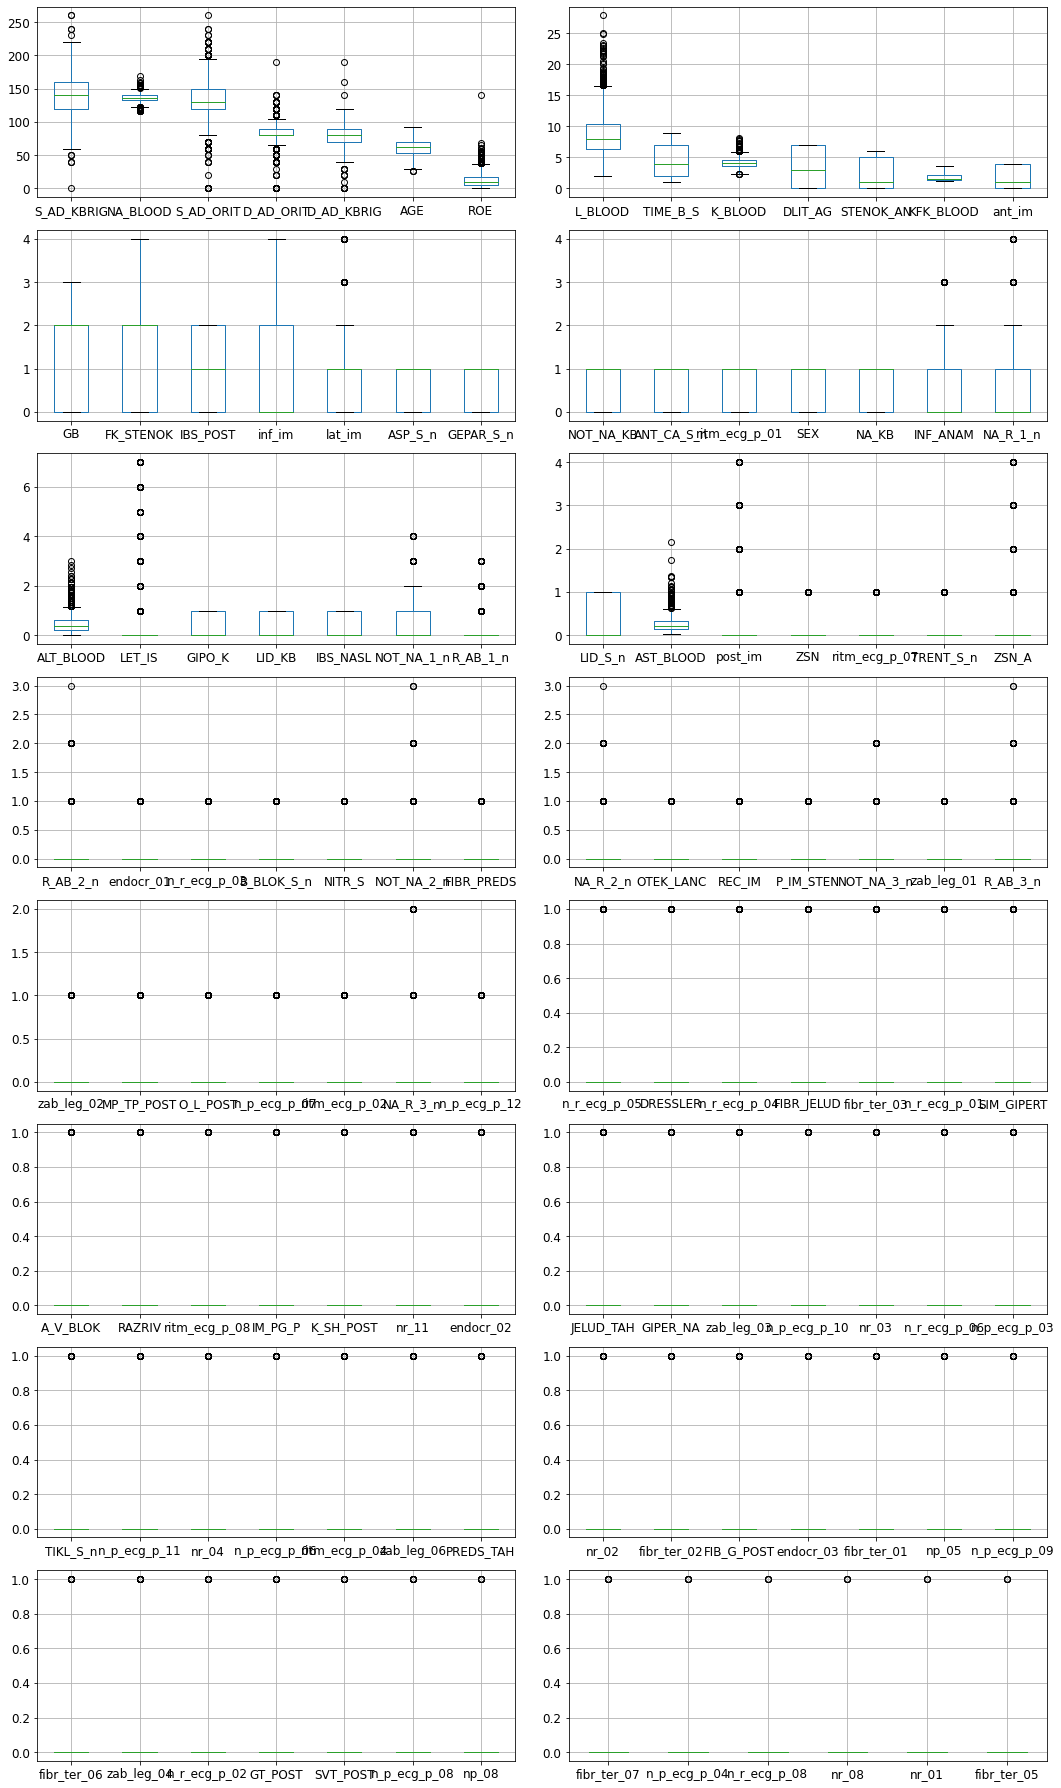

In [15]:
vis.plot_feature_boxplots(data, boxplot_cols, figsize=(15, 25), subplot_layout=(8, 2))

# Complications and lethal outcome:

In [16]:
COMPLICATIONS_COLS = ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
                      'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']
COMPLICATIONS_NAMES = ['Atrial fibrillation', 'Supraventricular tachycardia', 'Ventricular tachycardia', 'Ventricular fibrillation', 'Third-degree AV block',
                       'Pulmonary edema', 'Myocardial rupture', 'Dressler syndrome', 'Chronic heart failure', 'Relapse of the myocardial infarction', 'Post-infarction angina']
TARGET_NAMES = ['Alive', 'Cardiogenic shock', 'Pulmonary edema', 'Myocardial rupture',
                'Progress of congestive heart failure',
                'Thromboembolism', 'Asystole', 'Ventricular fibrillation']

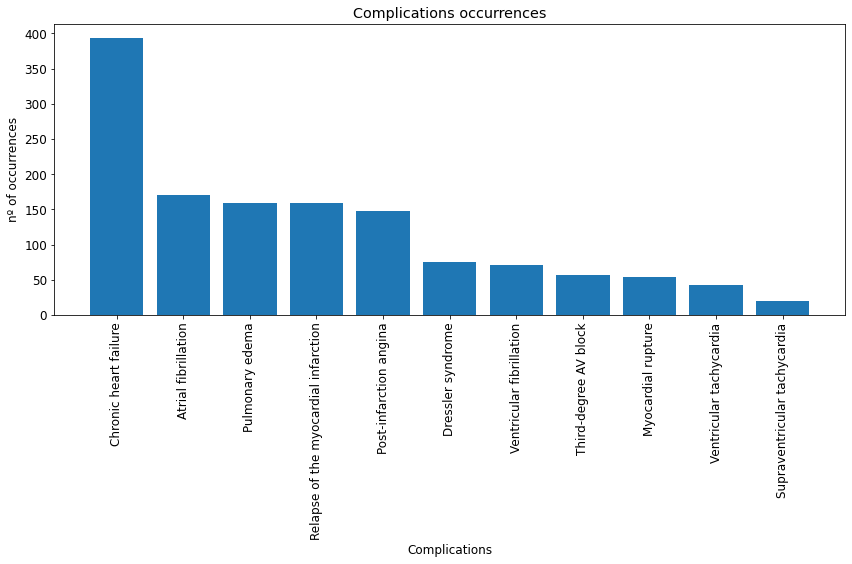

In [17]:
# Complications counts:
complications_counts = pd.DataFrame(data[COMPLICATIONS_COLS].sum(axis=0))
complications_counts.index = COMPLICATIONS_NAMES
complications_counts = complications_counts.sort_values(by=0, ascending=False)
complications_counts

plt.figure(figsize=(12, 8))
plt.title('Complications occurrences')
plt.bar(complications_counts.index, complications_counts[0])
plt.xticks(rotation=90)
plt.xlabel('Complications')
plt.ylabel('nº of occurrences')
plt.tight_layout()
plt.savefig('./imgs/Complications occurrences.png', dpi=100)
plt.show()

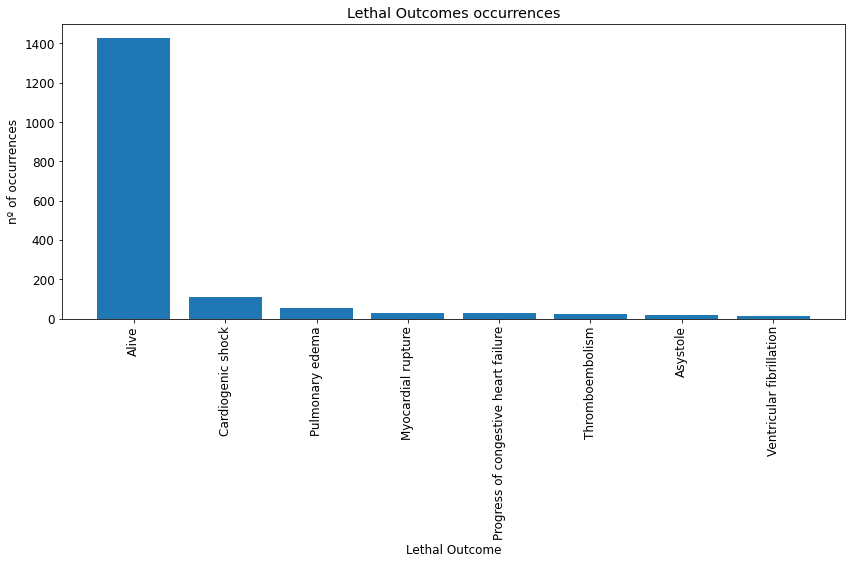

In [18]:
# Lethal Outcome counts:
plt.figure(figsize=(12, 8))
plt.title('Lethal Outcomes occurrences')
plt.bar(TARGET_NAMES, data['LET_IS'].value_counts(dropna=False))
plt.xticks(rotation=90)
plt.xlabel('Lethal Outcome')
plt.ylabel('nº of occurrences')
plt.tight_layout()
plt.savefig('./imgs/Lethal Outcomes occurrences.png', dpi=100)
plt.show()

In [19]:
data['LET_IS'].value_counts(dropna=False)

0    1429
1     110
3      54
6      27
7      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

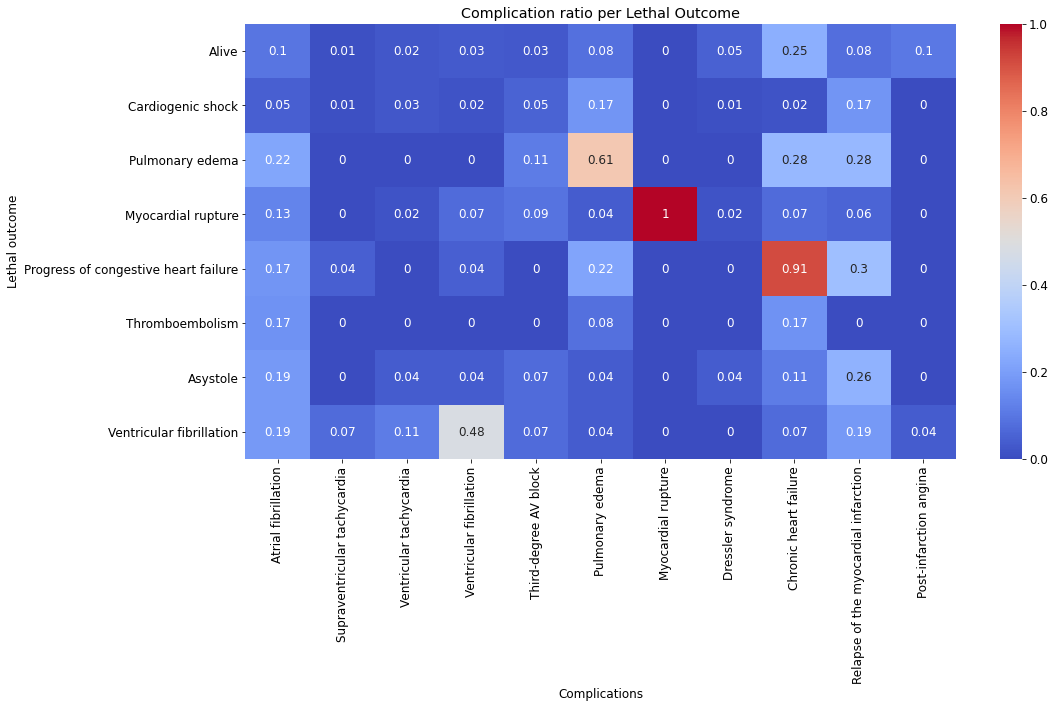

In [20]:
# Complication ration per Lethal Outcome:
results = []
for y in data[TARGET_COL].unique():
    dftmp = data[data[TARGET_COL] == y]
    results.append(dftmp[COMPLICATIONS_COLS].mean(axis=0).to_dict())
    results[-1][TARGET_COL] = y
results = pd.DataFrame(results)
results = results.sort_values(by=TARGET_COL).drop(columns=[TARGET_COL])
results.index = TARGET_NAMES
results.columns = COMPLICATIONS_NAMES

plt.figure(figsize=(16, 10))
plt.title('Complication ratio per Lethal Outcome')
sns.heatmap(results, cmap='coolwarm', annot=results.values.round(2))
plt.xlabel('Complications')
plt.ylabel('Lethal outcome')
plt.tight_layout()
plt.savefig('./imgs/Complication ratio per Lethal Outcome.png', dpi=100)
plt.show()

# Daily measurements:

In [21]:
data[INPUT_COLS_1stday+INPUT_COLS_2ndday+INPUT_COLS_3rdday].isnull().sum(axis=0)

R_AB_1_n       16
NA_R_1_n        5
NOT_NA_1_n     10
R_AB_2_n      108
NA_R_2_n      108
NOT_NA_2_n    110
R_AB_3_n      128
NA_R_3_n      131
NOT_NA_3_n    131
dtype: int64

In [22]:
data[TARGET_COL][data[INPUT_COLS_1stday].isnull().sum(axis=1).astype(bool)].value_counts()

1    12
0    10
2     1
7     1
Name: LET_IS, dtype: int64

In [23]:
data[TARGET_COL][data[INPUT_COLS_2ndday].isnull().sum(axis=1).astype(bool)].value_counts()

1    74
3    17
0    10
7     6
2     5
6     4
Name: LET_IS, dtype: int64

In [24]:
data[TARGET_COL][data[INPUT_COLS_3rdday].isnull().sum(axis=1).astype(bool)].value_counts()

1    85
3    22
0    12
7     7
6     6
2     5
5     1
Name: LET_IS, dtype: int64

In [25]:
data[INPUT_COLS_1stday+INPUT_COLS_2ndday+INPUT_COLS_3rdday+[TARGET_COL]][data[INPUT_COLS_1stday+INPUT_COLS_2ndday+INPUT_COLS_3rdday].isnull().sum(axis=1).astype(bool)]

,R_AB_1_n,NA_R_1_n,NOT_NA_1_n,R_AB_2_n,NA_R_2_n,NOT_NA_2_n,R_AB_3_n,NA_R_3_n,NOT_NA_3_n,LET_IS
54,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0
58,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0
189,0.0,0.0,NaN,1.0,0.0,NaN,1.0,0.0,NaN,0
355,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,0
377,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0
380,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0
396,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0
1060,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0
1101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0


In [26]:
data[TARGET_COL][data[INPUT_COLS_1stday+INPUT_COLS_2ndday+INPUT_COLS_3rdday].isnull().sum(axis=1).astype(bool)].value_counts()

1    85
3    22
0    12
7     8
6     6
2     5
5     1
Name: LET_IS, dtype: int64

In [27]:
data[TARGET_COL][data[INPUT_COLS_1stday+INPUT_COLS_2ndday+INPUT_COLS_3rdday].isnull().sum(axis=1).astype(bool)].value_counts().sum()

139

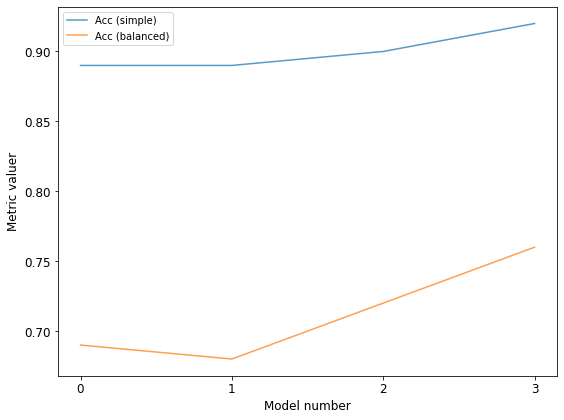

In [38]:
model_number = [0, 1, 2, 3]
acc_simple = [0.89, 0.89, 0.90, 0.92]
acc_balanced = [0.69, 0.68, 0.72, 0.76]

plt.figure(figsize=(8, 6))
plt.plot(model_number, acc_simple, label='Acc (simple)', alpha=0.75)
plt.plot(model_number, acc_balanced, label='Acc (balanced)', alpha=0.75)

plt.xticks(model_number)
plt.xlabel('Model number')
plt.ylabel('Metric valuer')
plt.legend(loc='best', prop={'size': 10})
plt.tight_layout()
plt.savefig('./imgs/models_summary.png', dpi=100)
plt.show()